In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import itertools
import json


In [2]:
df = pd.read_csv('wikIR1k/documents.csv')

In [3]:
df

,id_right,text_right
0,1781133,it was used in landing craft during world war ...
1,2426736,after rejecting an offer from cambridge univer...
2,2224122,mat zan coached kuala lumpur fa in 1999 and wo...
3,219642,a barcode is a machine readable optical label ...
4,1728654,since the subordination of the monarchy under ...
...,...,...
369716,59396,the population was 416 at the 2010 census the ...
369717,1950034,the surface of the river is frozen from novemb...
369718,1984468,the first anti thrombin aptamer tba was genera...
369719,33966,state of oklahoma as of the 2010 census the po...


In [4]:
lengths_in_words = []
total_words_len = 0
unique_words_len = 0
words_freq = {}

print('Building the frequency list...')
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    
    tokens = row['text_right'].split()
    lengths_in_words.append(len(tokens))

    for token in tokens:
        total_words_len += len(token)
        
        if token in words_freq:
            words_freq[token] += 1
        else:
            words_freq[token] = 1
            unique_words_len += len(token)

print('Sorting descending...\n')
words_freq = {k: v for k, v in sorted(words_freq.items(), key=lambda item: item[1], reverse=True)}

print('STATS:')
print('Number of documents:', df.shape[0])
print('Average document length in words:', np.mean(lengths_in_words))
print('Collection size in words:', np.sum(lengths_in_words))
print('Number of unique words:', len(words_freq))
print('Average word length:', total_words_len / np.sum(lengths_in_words))
print('Average unique words length:', unique_words_len / len(words_freq))


Building the frequency list...


100%|████████████████████████████████| 369721/369721 [00:31<00:00, 11721.94it/s]


Sorting descending...

STATS:
Number of documents: 369721
Average document length in words: 197.69969517555128
Collection size in words: 73093729
Number of unique words: 794568
Average word length: 4.795127048450353
Average unique words length: 7.714459932944695


In [5]:
top30 = dict(itertools.islice(words_freq.items(), 30))
top30

{'the': 5311943,
 'of': 2532382,
 'in': 2355417,
 'and': 2231007,
 'a': 1557760,
 'to': 1407261,
 'was': 1078183,
 'he': 685303,
 'is': 676829,
 'as': 661622,
 'for': 616110,
 'on': 610583,
 'with': 535843,
 'by': 526627,
 's': 497472,
 'at': 482839,
 'his': 440633,
 'from': 432326,
 'it': 398308,
 'that': 306808,
 'an': 279228,
 'which': 221057,
 'first': 217204,
 'are': 206921,
 'were': 205684,
 'has': 195167,
 'also': 186055,
 'she': 184297,
 'after': 166616,
 'its': 161439}

In [6]:
for w in top30:
    print(w)

the
of
in
and
a
to
was
he
is
as
for
on
with
by
s
at
his
from
it
that
an
which
first
are
were
has
also
she
after
its


In [7]:
with open('en_stop_words.txt') as file:
    en_stop_words = file.read().splitlines()
en_stop_words


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [8]:
for key in top30.keys():
    print(f'{key} \t {key in en_stop_words}')

the 	 True
of 	 True
in 	 True
and 	 True
a 	 True
to 	 True
was 	 True
he 	 True
is 	 True
as 	 True
for 	 True
on 	 True
with 	 True
by 	 True
s 	 True
at 	 True
his 	 True
from 	 True
it 	 True
that 	 True
an 	 True
which 	 True
first 	 False
are 	 True
were 	 True
has 	 True
also 	 False
she 	 True
after 	 True
its 	 True


# Plots

## Zipf's Law

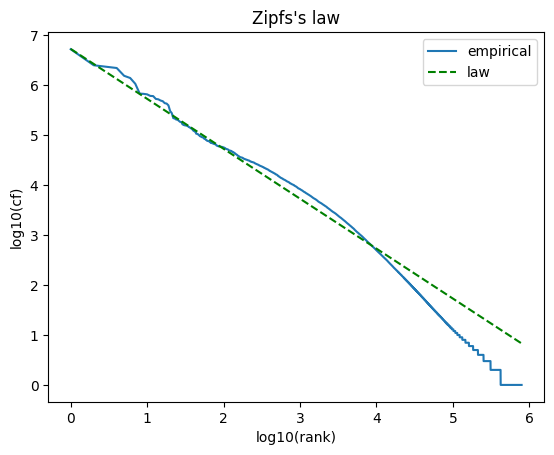

In [9]:
rank = np.arange(len(words_freq)) + 1
cfs = np.array(list(words_freq.values()))

x = np.log10(rank)
y = np.log10(cfs)
plt.plot(x, y, label='empirical')
plt.plot(x, np.log10(cfs.sum() / np.log(len(cfs)) / rank), 'g--', label='law')
plt.xlabel('log10(rank)')
plt.ylabel('log10(cf)')
plt.title("Zipfs's law")
plt.legend()
plt.show()

In [10]:
np.log(len(cfs))

13.585553849716817

## Heaps' Law

In [11]:
collect_sizes = []
vocab_sizes = []

# tmp vars
total_length = 0
total_unique_words = set()

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    
    tokens = row['text_right'].split()
    
    # Append to collection sizes list
    total_length += len(tokens)
    collect_sizes.append(total_length)
    
    # Append to vocabulary sizes list
    total_unique_words.update(tokens)
    vocab_sizes.append(len(total_unique_words))
    

100%|████████████████████████████████| 369721/369721 [00:15<00:00, 23819.32it/s]


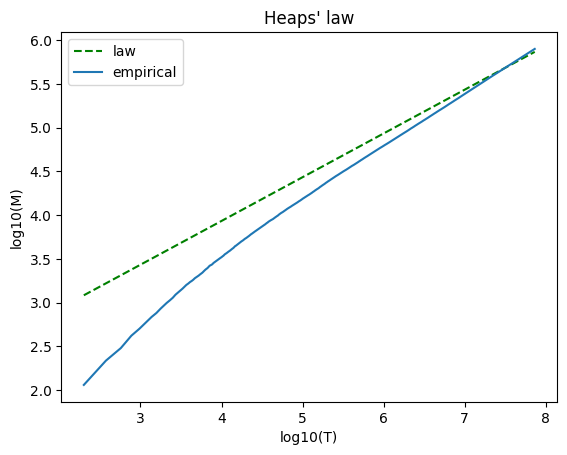

In [12]:
# Heaps' Law
T = np.array(collect_sizes)
k = 86
b = 0.5
plt.plot(np.log10(T), np.log10(k*T**b), 'g--', label='law')

# Zipf's Law
x = np.log10(collect_sizes)
y = np.log10(vocab_sizes)
plt.plot(x, y, label='empirical')

plt.xlabel('log10(T)')
plt.ylabel('log10(M)')
plt.title("Heaps' law")
plt.legend()
plt.show()

# Lemmatization

In [24]:
import spacy
nlp = spacy.load('en_core_web_sm')

# In the first run

# token_lemma_dict = {}

# for index, row in tqdm(df.iterrows(), total=df.shape[0]):
#     doc = nlp(row['text_right'])
    
#     for token in doc:
#         if token.text not in token_lemma_dict:
#             token_lemma_dict[token.text] = token.lemma_

# with open('lemmas.json', 'w') as f:
#     json.dump(token_lemma_dict, f)



In [25]:
# Later

with open('lemmas.json') as f:
    token_lemma_dict = json.load(f)

lemmas = set(token_lemma_dict.values())

In [26]:
token_lemma_dict

{'it': 'it',
 'was': 'be',
 'used': 'use',
 'in': 'in',
 'landing': 'landing',
 'craft': 'craft',
 'during': 'during',
 'world': 'world',
 'war': 'war',
 'ii': 'ii',
 'and': 'and',
 'is': 'be',
 'today': 'today',
 'private': 'private',
 'boats': 'boat',
 'training': 'training',
 'facilities': 'facility',
 'the': 'the',
 '6': '6',
 '71': '71',
 'an': 'an',
 'inline': 'inline',
 'six': 'six',
 'cylinder': 'cylinder',
 'diesel': 'diesel',
 'engine': 'engine',
 'refers': 'refer',
 'to': 'to',
 'displacement': 'displacement',
 'cubic': 'cubic',
 'inches': 'inch',
 'of': 'of',
 'each': 'each',
 'firing': 'firing',
 'order': 'order',
 '1': '1',
 '5': '5',
 '3': '3',
 '2': '2',
 '4': '4',
 's': 's',
 'compression': 'compression',
 'ratio': 'ratio',
 '18': '18',
 '7': '7',
 'with': 'with',
 'a': 'a',
 '250': '250',
 'inch': 'inch',
 'bore': 'bore',
 '00': '00',
 'stroke': 'stroke',
 'weighs': 'weigh',
 '54': '54',
 'long': 'long',
 '29': '29',
 'wide': 'wide',
 '41': '41',
 'tall': 'tall',
 'at

In [27]:
print(f'Number of words for lemmatization: {len(token_lemma_dict)}')
print(f'Number of lemmatized (normalized) words: {len(lemmas)}')
print(f'Average length of lemmatized words: {sum(map(len, lemmas)) / float(len(lemmas))}')


Number of words for lemmatization: 793108
Number of lemmatized (normalized) words: 740496
Average length of lemmatized words: 7.629927778137897
